# Курс ["Алгоритмы анализа данных"](https://gb.ru/lessons/177362)

# Урок 5. Случайный лес

In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import datasets
from sklearn import model_selection

In [2]:
from myalglibs import RandomForestRegressor 
from myalglibs import RandomForestClassifier
from myalglibs import MyQualityMetrics
from myalglibs.lesson_forest import  *

In [3]:
warnings.filterwarnings('ignore')

In [4]:
 %matplotlib inline

## Задание 1.

### 1.1. Сформировать с помощью sklearn.make_classification датасет из 1000 объектов с двумя признаками.

In [5]:
classification_data, classification_labels = datasets.make_classification(n_samples=1000,
                                                                          n_features = 2, 
                                                                          n_informative = 2, 
                                                                          n_classes = 2, 
                                                                          n_redundant=0,
                                                                          n_clusters_per_class=1,
                                                                          flip_y=0.1,
                                                                          random_state=42)

In [6]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(classification_data,
                                                                                     classification_labels,
                                                                                     test_size=0.3,
                                                                                     random_state=42)

In [7]:
train_data[:5], train_labels[:5]

(array([[ 2.07911136, -0.18449221],
        [ 2.05595553,  0.04760408],
        [ 0.52015439,  1.5129143 ],
        [ 0.45139599, -1.49760155],
        [ 0.94353746, -1.14699014]]),
 array([0, 0, 1, 0, 0]))

### 1.2. Обучить случайный лес из 1, 3, 10, 50, 100 и 200 деревьев (за основу взять реализацию построения этого алгоритма из урока).

In [8]:
predictions = pd.DataFrame(index=['tp', 'tn', 'fn', 'fp', 'accuracy', 'precission', 'recall', 'f1score'])

In [9]:
for i in [1, 3, 10, 50, 100, 200]:
    rfc = RandomForestClassifier(x=train_data, y=train_labels, n_trees=i)
    metrics = MyQualityMetrics(test_labels, rfc.predict(test_data))
    predictions[f'n_trees={i}'] = metrics.stats[0]

In [10]:
predictions

,n_trees=1,n_trees=3,n_trees=10,n_trees=50,n_trees=100,n_trees=200
tp,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
tn,122.000000,120.000000,120.000000,120.000000,119.000000,119.000000
fn,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
fp,14.000000,16.000000,16.000000,16.000000,17.000000,17.000000
accuracy,0.906667,0.900000,0.900000,0.900000,0.896667,0.896667
precission,0.914634,0.903614,0.903614,0.903614,0.898204,0.898204
recall,0.914634,0.914634,0.914634,0.914634,0.914634,0.914634
f1score,0.914634,0.909091,0.909091,0.909091,0.906344,0.906344


### 1.3. Визуализировать их разделяющие линии на графиках (по подобию визуализации деревьев из предыдущего урока, необходимо только заменить вызов функции predict на tree_vote).

*Пока не получилось встроить функцию в объект. Просто обогатил функции с урока и выполнил задание в стиле функционального программирования. Как будет возможность - доработаю встроенную визуализацию*

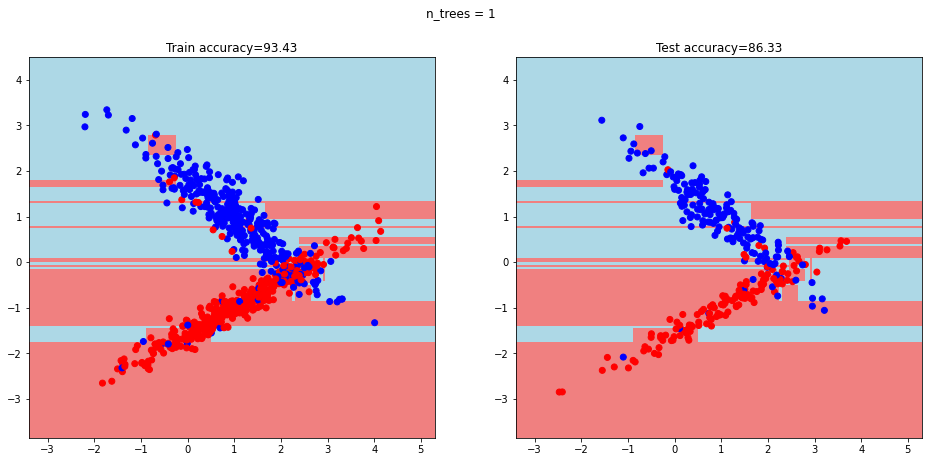

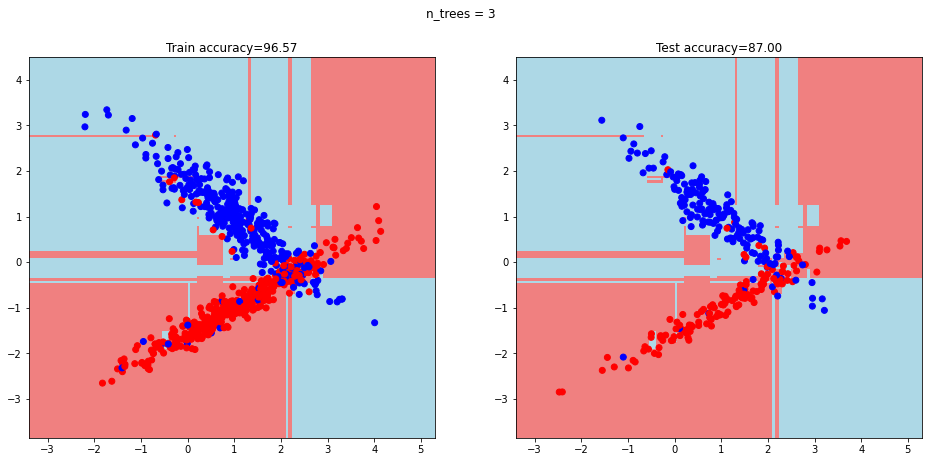

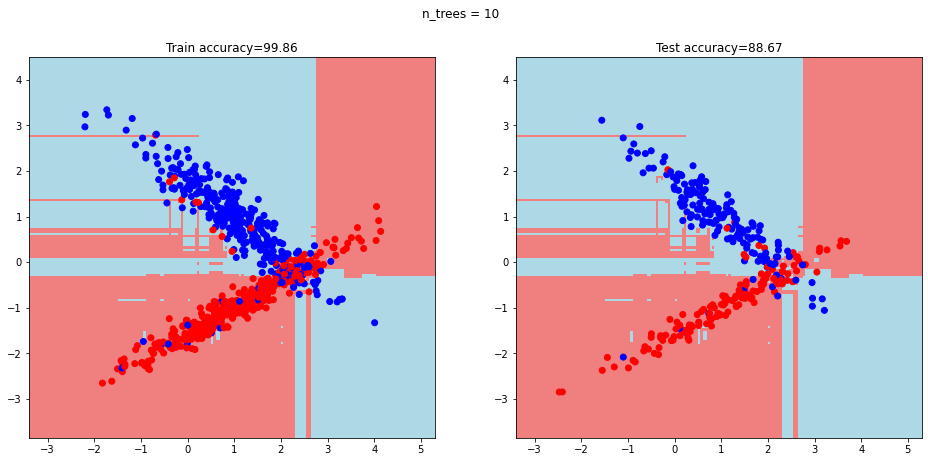

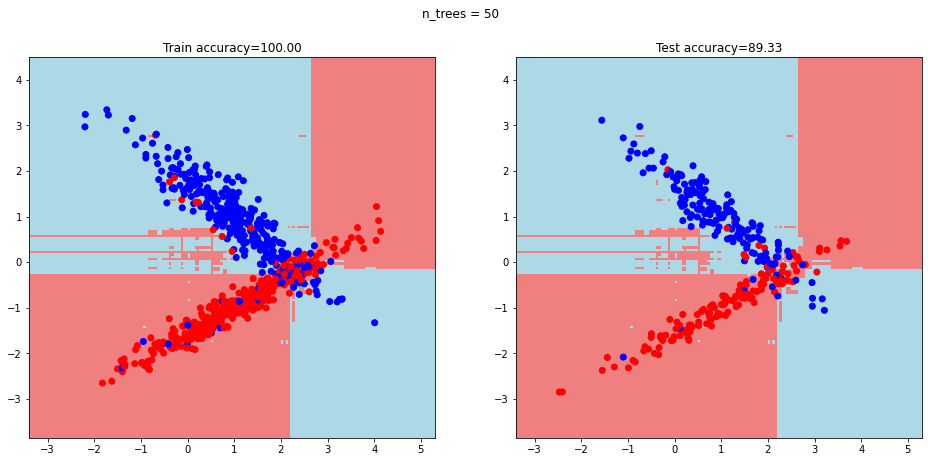

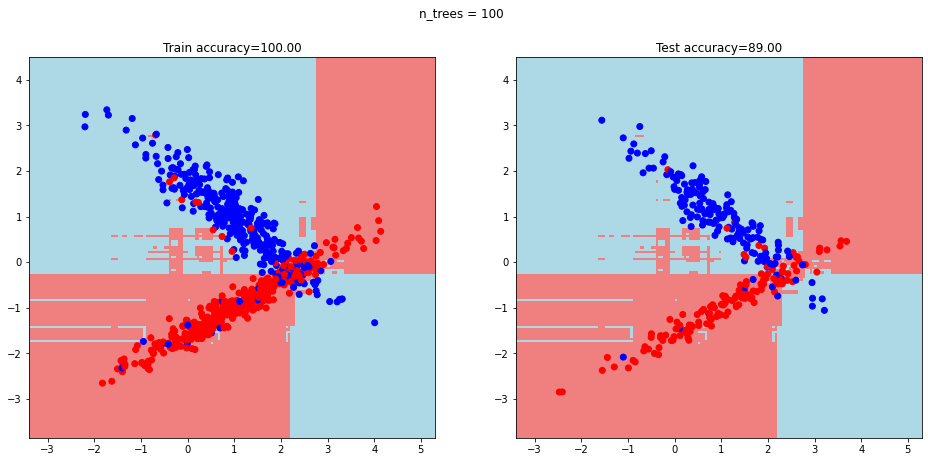

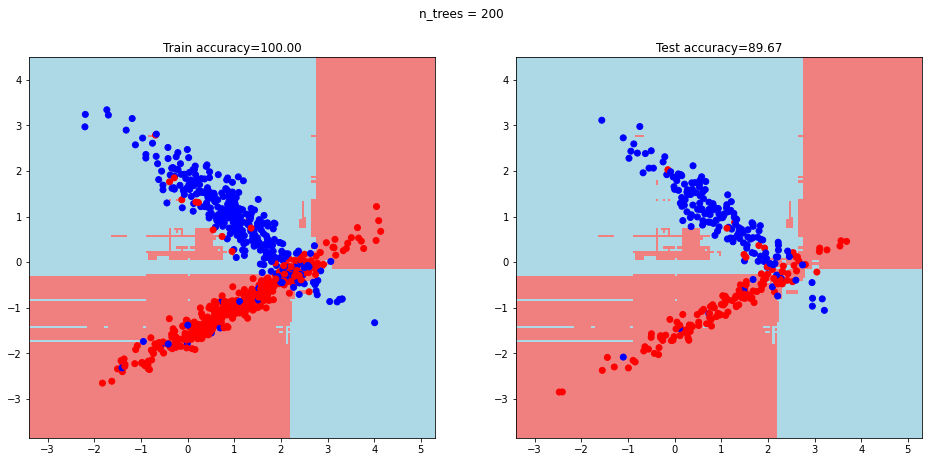

In [11]:
for n_trees in [1, 3, 10, 50, 100, 200]:
    my_forest = random_forest(train_data, train_labels, n_trees)
    visual_tree(my_forest, train_data, test_data, train_labels, test_labels, n_trees)

### 1.4. Сделать выводы о получаемой сложности гиперплоскости и недообучении или переобучении случайного леса в зависимости от количества деревьев в нем.

Гиперплоскость усложняется с ростом числа деревьем до 10 деревьев, после этого усложнения незначительны. До 10 деревьев алгоритм выглядит недообученым, хочется посадить побольше деревьев. По переобученности - RF довольно устойчивый к переобучению алгоритм. При росте числа деревьев скорее растут накладные расходы, чем риск переобучения

## Задание 2. 

### Заменить в реализованном алгоритме проверку с помощью отложенной выборки на Out-of-Bag.

In [12]:
def get_bootstrap(data, labels, N):
    n_samples = data.shape[0]
    bootstrap = []
    
    for i in range(N):
        b_data = np.zeros(data.shape)
        b_labels = np.zeros(labels.shape)
        oob_data = data.copy()
        oob_labels = labels.copy()
        del_indexes = set()
        
        for j in range(n_samples):
            sample_index = random.randint(0, n_samples-1)
            b_data[j] = data[sample_index]
            b_labels[j] = labels[sample_index]
            del_indexes.add(sample_index)

        oob_data = np.delete(oob_data, list(del_indexes), axis=0)
        oob_labels = np.delete(oob_labels, list(del_indexes), axis=0)

        bootstrap.append((b_data, 
                          b_labels,
                          oob_data, 
                          oob_labels))
        
    return bootstrap